# PARCIAL 2

## Punto 1

#### A)

Se encuentra en el pdf adjunto en la carpeta Parcial_2

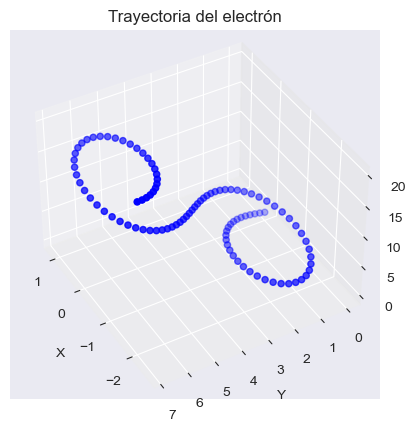

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
q = -1  
m = 1   
B0 = 1  
omega = 0.3
omega0 = abs(q) * B0 / m
def f(t, y):
    vx, vy, vz = y[3], y[4], y[5]
    return np.array([vx,
                     vy,
                     vz,
                     -omega0 * vy * np.sin(omega * t),
                     omega0 * vx * np.sin(omega * t),
                     0])
def runge_kutta2(f, a, b, y0, N):
    t_values = np.linspace(a, b, N)
    h = t_values[1] - t_values[0]
    y_values = np.zeros((N, len(y0)))
    y_values[0] = y0
    for i in range(N - 1):
        k1 = h * f(t_values[i], y_values[i])
        k2 = h * f(t_values[i] + h, y_values[i] + k1)
        y_values[i + 1] = y_values[i] + 0.5 * (k1 + k2)
    return t_values, y_values
y0 = np.array([0, 0, 0, 0, 1, 1])
a, b = 0, 20
N = 100
t_values, y_values = runge_kutta2(f, a, b, y0, N)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_values[:, 0], y_values[:, 1], y_values[:, 2], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria del electrón')
#no logre ajustar la vista pero con estos valores, elev y azim se puede cuadrar :)
ax.view_init(elev=40, azim=510)

plt.show()


## Punto 2

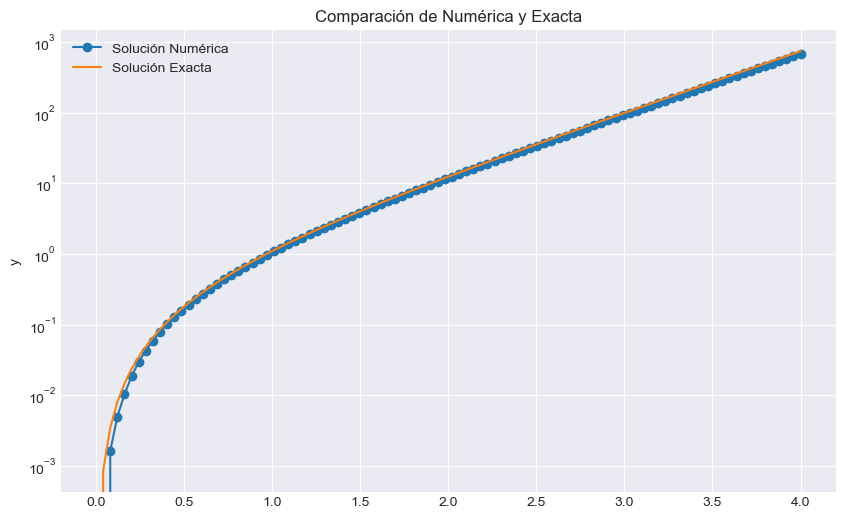

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def predictor_corrector(f, y0, h, t):
    y = [y0]
    for i in range(4):
        y.append(y[i] + h * f(t[i], y[i]))

    for i in range(4, len(t) - 1):
        predictor = y[i] + h * (1901/720 * f(t[i], y[i]) - 2774/720 * f(t[i-1], y[i-1]) + 
                                2616/720 * f(t[i-2], y[i-2]) - 1274/720 * f(t[i-3], y[i-3]) +
                                251/720 * f(t[i-4], y[i-4]))
        
        corrector = y[i] + h * (475/1440 * f(t[i+1], predictor) + 1427/1440 * f(t[i], y[i]) -
                                798/1440 * f(t[i-1], y[i-1]) + 482/1440 * f(t[i-2], y[i-2]) -
                                173/1440 * f(t[i-3], y[i-3]) + 27/1440 * f(t[i-4], y[i-4]))
        y.append(corrector)
    return y
def f(x, y):
    return x + 2 * y
def exact_solution(x):
    return -x/2 - (1 - np.exp(2*x))/4
h = 4 / 100
t = np.linspace(0., 4., 100)
y0 = 0
numerical_solution = predictor_corrector(f, y0, h, t)
exact = exact_solution(t)
plt.figure(figsize=(10, 6))
plt.plot(t, numerical_solution, label='Solución Numérica', marker='o')
plt.plot(t, exact, label='Solución Exacta')
plt.yscale('log') 
plt.ylabel('y')
plt.title('Comparación de Numérica y Exacta')
plt.legend()
plt.grid(True)
plt.show()


## Punto 3

#### A)

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def decay_system(state, time, lambda_a, lambda_b):
    N_A, N_B, N_C = state
    rate_A_to_B = -lambda_a * N_A
    rate_B_to_C = lambda_a * N_A - lambda_b * N_B
    rate_C_increase = lambda_b * N_B
    return [rate_A_to_B, rate_B_to_C, rate_C_increase]

initial_conditions = [500, 0, 0] 
time_span = np.linspace(0, 10, 50)  
lambda_A = 0.5
lambda_B = 0.3

#### B) N_i = [500,0,0]  i = A,B,C  t = [0,10] N=50

C:\Users\Samuel Eduardo\AppData\Local\Temp\ipykernel_4200\584489761.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


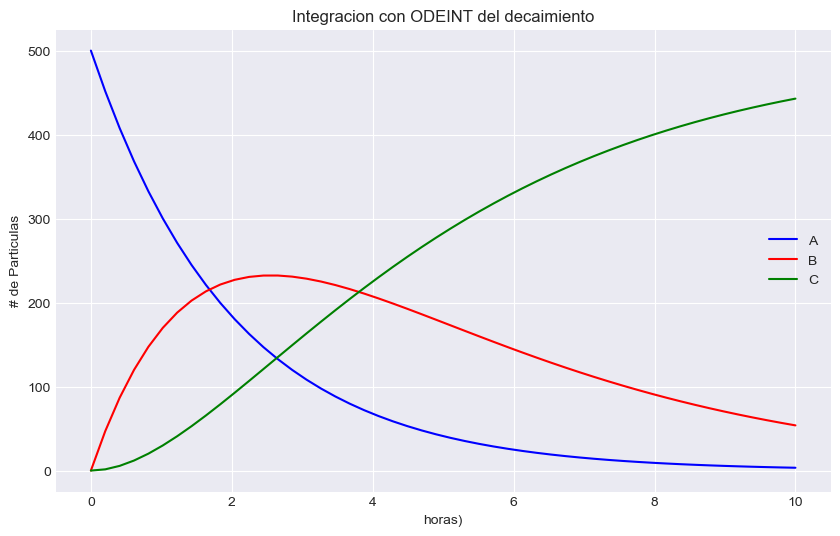

In [18]:
initial_conditions = [500, 0, 0] 
time_span = np.linspace(0, 10, 50)  
lambda_A = 0.5
lambda_B = 0.3

solution = odeint(decay_system, initial_conditions, time_span, args=(lambda_A, lambda_B))

N_A_solution = solution[:, 0]
N_B_solution = solution[:, 1]
N_C_solution = solution[:, 2]
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid') 
plt.plot(time_span, N_A_solution, label='A', color='blue')
plt.plot(time_span, N_B_solution, label='B', color='red')
plt.plot(time_span, N_C_solution, label='C', color='green')
plt.legend()
plt.xlabel('horas)')
plt.ylabel('# de Particulas')
plt.title('Integracion con ODEINT del decaimiento')
plt.grid(True)
plt.show()

#### C)

C:\Users\Samuel Eduardo\AppData\Local\Temp\ipykernel_4200\2838790012.py:47: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


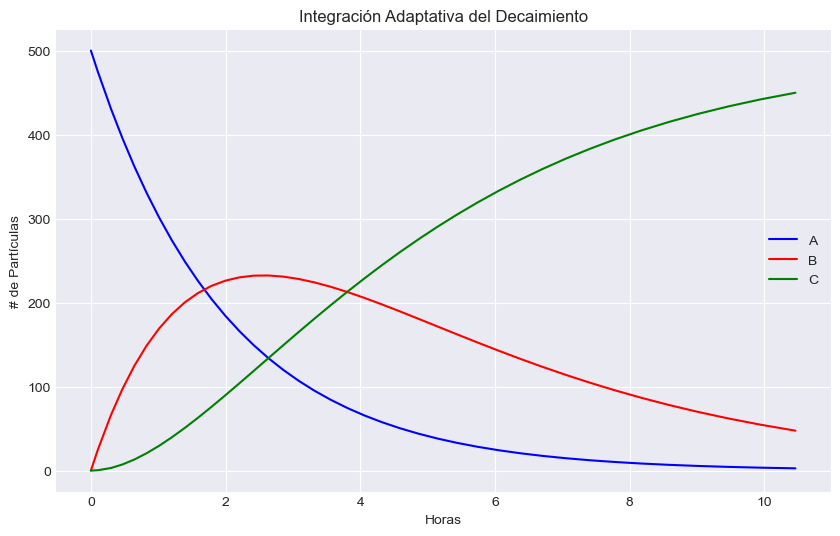

In [19]:


def rk4_step(func, current_state, current_time, step_size, lambda_a, lambda_b):
    k1 = func(current_state, current_time, lambda_a, lambda_b)
    k2 = func(current_state + 0.5 * step_size * np.array(k1), current_time + 0.5 * step_size, lambda_a, lambda_b)
    k3 = func(current_state + 0.5 * step_size * np.array(k2), current_time + 0.5 * step_size, lambda_a, lambda_b)
    k4 = func(current_state + step_size * np.array(k3), current_time + step_size, lambda_a, lambda_b)
    next_state = current_state + (step_size / 6.0) * (np.array(k1) + 2*np.array(k2) + 2*np.array(k3) + np.array(k4))
    return next_state

def adaptive_integration(func, initial_conditions, time_start, time_end, initial_step_size, error_tolerance, lambda_a, lambda_b):
    current_time = time_start
    current_state = np.array(initial_conditions)
    steps_taken = 0
    time_points = [current_time]
    state_points = [current_state]
    
    while current_time < time_end:
        steps_taken += 1
        if steps_taken > 45:  # 
            break
        

        state_half_step_1 = rk4_step(func, current_state, current_time, initial_step_size/2, lambda_a, lambda_b)
        state_full_step = rk4_step(func, state_half_step_1, current_time + initial_step_size/2, initial_step_size/2, lambda_a, lambda_b)
        
        state_double_step = rk4_step(func, current_state, current_time, initial_step_size, lambda_a, lambda_b)
        
        error_estimate = np.linalg.norm(state_full_step - state_double_step, ord=2)
        
        if error_estimate < error_tolerance:
            current_time += initial_step_size
            current_state = state_double_step
            time_points.append(current_time)
            state_points.append(current_state)
            initial_step_size *= min(2, 0.85 * (error_tolerance / error_estimate) ** 0.25) 
        else:
            initial_step_size *= 0.5  
            
    return np.array(time_points), np.array(state_points)

time_points, state_points = adaptive_integration(decay_system, initial_conditions, 0, 10, 0.1, 1e-4, lambda_A, lambda_B)

N_A_adaptive = state_points[:, 0]
N_B_adaptive = state_points[:, 1]
N_C_adaptive = state_points[:, 2]

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')  
plt.plot(time_points, N_A_adaptive, label='A', color='blue') 
plt.plot(time_points, N_B_adaptive, label='B', color='red')   
plt.plot(time_points, N_C_adaptive, label='C', color='green')
plt.legend()
plt.xlabel('Horas')
plt.ylabel('# de Partículas')
plt.title('Integración Adaptativa del Decaimiento')
plt.grid(True)
plt.show()


#### E) 

Las soluciones son iguales.

#### F) t donde B es max

In [22]:
indice_max_B = np.argmax(N_B_adaptive)
tiempo_max_B = time_points[indice_max_B]
print("El momento en el que la cantidad de partículas B es máxima es:", tiempo_max_B, "horas.")

El momento en el que la cantidad de partículas B es máxima es: 2.636770830618501 horas.


#### G)

In [23]:
particulas_B_max = N_B_adaptive[indice_max_B]
particulas_C_max = N_C_adaptive[indice_max_B]
print("En ese momento, hay", particulas_B_max, "partículas B y", particulas_C_max, "partículas C.")

En ese momento, hay 232.26223863297517 partículas B y 133.95413342735944 partículas C.
